In [1]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import Normalize
import numpy as np
import os
import matplotlib.pyplot as plt

from src.datasets import calculate_mean_and_std, BiosensorDataset

In [5]:
torch.manual_seed(42)

data_path = 'data_with_centers/'
train_percent = 0.86
bio_len = 128
mask_size = 80
batch_size = 4

files = os.listdir(data_path)
train_size = int(train_percent * len(files))
val_size = len(files) - train_size
train_files, val_files = torch.utils.data.random_split(files, [train_size, val_size])

mean, std = calculate_mean_and_std(data_path, train_files, biosensor_length=bio_len)
print(mean, std)

train_dataset = BiosensorDataset(data_path, train_files, mean, std, bool, biosensor_length=bio_len, mask_size=mask_size)
val_dataset = BiosensorDataset(data_path, val_files, mean, std, bool, biosensor_length=bio_len, mask_size=mask_size)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

tensor(37.1629) tensor(164.0161)


torch.Size([4, 128, 80, 80])
torch.Size([4, 80, 80])


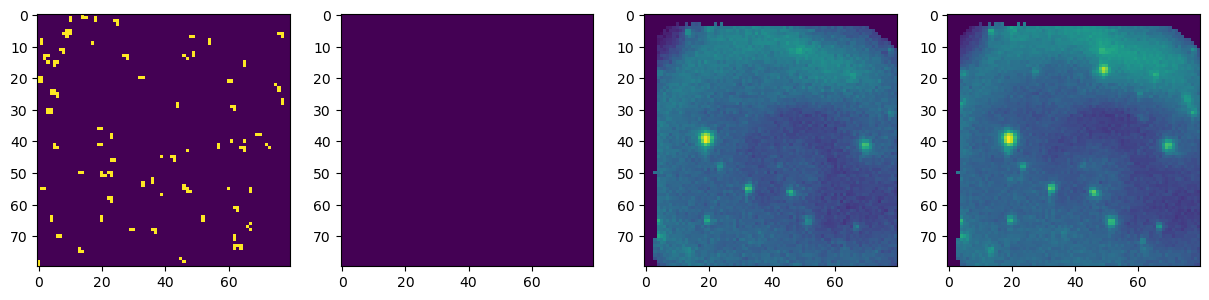

In [6]:
for bio, mask in train_loader:
    print(bio.shape)
    print(mask.shape)

    fig, axs = plt.subplots(1, 4, figsize=(15, 20))
    axs[0].imshow(mask[0])
    axs[1].imshow(bio[0][0])
    axs[2].imshow(bio[0][8])
    axs[3].imshow(bio[0][15])
    plt.show()

    break